In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 24,
                     'xtick.labelsize': 20,
                     'ytick.labelsize': 20,
                     'axes.titlesize': 20,
                     'axes.labelsize': 24,
                     'mathtext.fontset': 'stix',
                     'font.family': 'STIXGeneral'})

In [17]:
d=8
features=2
prefix = f'features={features}/d={d}/overlap_'
#prefix = f'features={features}/d={d}/'
d2=16
features2=8
prefix2 = f'features={features2}/d={d2}/overlap_'
#prefix2 = f'features={features2}/d={d2}/'

[-2.20638056  0.26420975]
[-2.1703972   0.11909628]


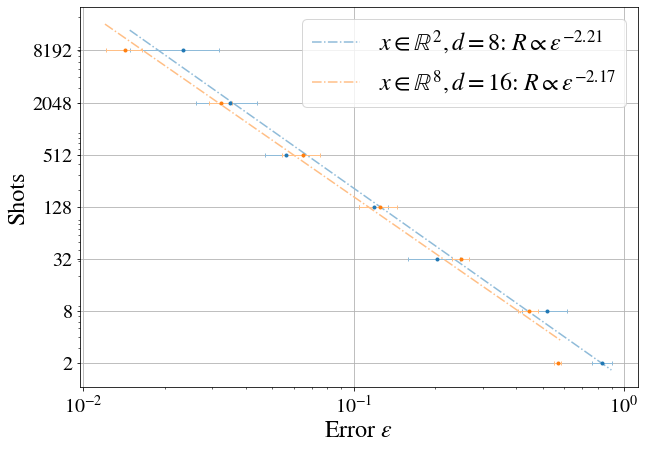

In [18]:
plt.figure(figsize=(10,7))

# blue
color_0 = '#1f77b4'
color_0_light = '#8fbbd9'

# orange
color_1 = '#ff7f0e'
color_1_light = '#ffbf86'

colors = [color_0, color_1]
colors_light = [color_0_light,color_1_light]
labels = [r'$x \in \mathbb{R}^2, d=8$: ',r'$x \in \mathbb{R}^8, d=16$: ']

for i, pre in enumerate([prefix,prefix2]):
    df = pd.read_csv(f'{pre}spsa_approx_tests.csv')
    df = df[df['Evaluations'] > 600]
    shots = list(set(df['Shots']))
    means = [np.mean(df['Epsilon'][df['Shots'] == R][:7]) for R in shots]
    stds = [np.std(df['Epsilon'][df['Shots'] == R][:7]) for R in shots]
    #plt.scatter(df['Epsilon'],df['Shots'])
    plt.errorbar(means,shots,xerr=stds,marker='.',ecolor=colors_light[i],elinewidth=1.,ls='',capsize=2,color=colors[i])
    p = np.polyfit(np.log(means),np.log(shots),1)
    print(p)
    efine = np.linspace(min(df['Epsilon']),max(df['Epsilon']))
    plt.plot(efine,np.exp(p[1])*efine**(p[0]),linestyle='-.',color=colors_light[i] ,label=labels[i] + r'$R\propto\varepsilon^{{%.2f}}$'%p[0])

plt.xscale('log')
plt.yscale('log')
plt.ylabel('Shots')
plt.yticks(shots,[int(s) for s in shots])
plt.xlabel(r'Error $\varepsilon$')
plt.legend()
plt.grid()
plt.savefig('plots/exponent_overlap.png',dpi=200)
#plt.savefig('plots/exponent_separable.png',dpi=200)

